In [6]:
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils.centroids import centroid_sources
from photutils.centroids import (centroid_1dg, centroid_2dg, centroid_com, centroid_quadratic)
import sep

In [2]:
# converting dolphot coords into s-extractor coords 
# s-extractor and ds9 have the same coord convention, which is nice ig :/
# for some reason dolphot and photuils decided to be unique where they have it different
def dol_to_sex(x_orig, y_orig):
    x_new = 0.5 + x_orig
    y_new = 0.5 + y_orig
    return x_new, y_new

dol_to_sex(2494.37, 3225.37)

(2494.87, 3225.87)

In [3]:
# convserting photutils coords into s-extractor coords
# plug the coordinates generated using coord_loc() here to get accurate ds9/s-extractor coordinates
def photutil_to_sex(x_orig, y_orig):
    x_new = 1 + x_orig
    y_new = 1 + y_orig
    return(x_new, y_new)

photutil_to_sex(2249.63236967, 2251.47814589)

(2250.63236967, 2252.47814589)

In [4]:
# function to find the exact coords of the sn using a guess of where it is
# also plots an img with a marker on it just cause lol
# boxsize is size of the box for the img it generates
# img has to be in quotes lmao
# guess_x, guess_y is the approx location of the sn in the post expl img (in pxls)

# test later w/other images lmaoooooooo
# also too lazy to generalize boxsize since i tried it with another size and i got a meh
def coord_loc(fits_img, guess_x, guess_y, boxsize):
    test = fits.open(fits_img)
    data = test[0].data
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    ax.imshow(data[round(guess_y-boxsize/2):round(guess_y+boxsize/2), #zooms in 250x!
                   round(guess_x-boxsize/2):round(guess_x+boxsize/2)], origin='lower', interpolation='nearest') 
    x, y = centroid_sources(data, guess_x, guess_y, box_size=21, centroid_func=centroid_com)
    plt.plot(x/250, y/250, color= "red" , marker= "+", ms=15, mew=2.0)
    print(x)  
    print(y)
    test.close()

[2249.63236967]
[2251.47814589]


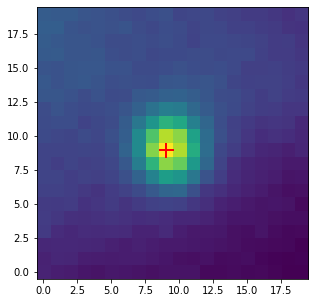

In [5]:
coord_loc("2023bvj.i.ut230418.1040_stch_1.sw.fits", 2250, 2251, 20)